In [1]:
## MINIST 데이터셋 다운받기
from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path = 'mnist.npz')

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
## 데이터의 형태 확인하기
# 학습데이터
print(x_train.shape, y_train.shape)
print(y_train)

# 테스트 데이터
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


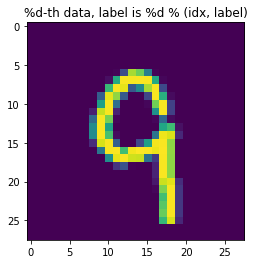

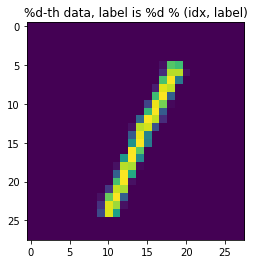

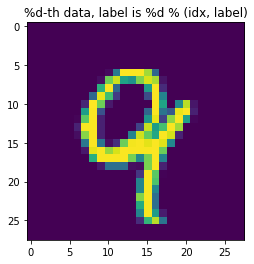

In [7]:
## 데이터 그려보기
import matplotlib.pyplot as plt
import numpy as np

sample_size = 3
#0~599999의 범위에서 무작위로 세 개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size = sample_size)

for idx in random_idx:
    img = x_train[idx, :]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title('%d-th data, label is %d % (idx, label)')

In [9]:
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (29400, 28, 28) 레이블 (29400,)
검증 데이터 (12600, 28, 28) 레이블 (12600,)


In [10]:
# 모델 입력을 위한 데이터 전처리
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모델의 입력으로 사용하기 위한 전처리 과정입니다.
x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape) # 모델 입력을 위해 데이터를 784 차원으로 변경합니다.

(29400, 784)


In [11]:
# 모델 입력을 위한 레이블 전처리
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
